In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas


In [2]:
data = pd.read_csv("../data/loan.csv")
data.head()

C:\Users\os\AppData\Local\Temp\ipykernel_23192\2981863113.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [5]:
# Drop unwanted statuses
drop_statuses = [
    "Current",
    "Late (16-30 days)",
    "In Grace Period",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]
data = data[~data['loan_status'].isin(drop_statuses)]

# Replace statuses with binary labels
data['loan_status'] = data['loan_status'].replace({
    'Fully Paid': 'Good Loan',
    'Charged Off': 'Bad Loan',
    'Late (31-120 days)': 'Bad Loan',
    'Default': 'Bad Loan'
})

# Confirm result
print(data['loan_status'].value_counts())


loan_status
Good Loan    1041952
Bad Loan      283583
Name: count, dtype: int64


In [6]:
data["loan_status"].value_counts()

loan_status
Good Loan    1041952
Bad Loan      283583
Name: count, dtype: int64

In [7]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350,
    rot=45  # rotate x-axis labels 45 degrees (or try 90 for vertical)
)

:Bars   [loan_status]   (count)

In [8]:
data['loan_status_encoded'] = (data['loan_status'] == 'Bad Loan').astype(int)

In [9]:
data['loan_status_encoded'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350,
    rot=45  # rotate x-axis labels 45 degrees (or try 90 for vertical)
)

:Bars   [loan_status_encoded]   (count)

### Loan Characteristics

In [10]:
data["loan_amnt"].value_counts()

loan_amnt
10000    97992
12000    71790
20000    69522
15000    69098
35000    50793
         ...  
35350        1
38925        1
39700        1
39225        1
38125        1
Name: count, Length: 1557, dtype: int64

In [11]:
data["installment"].value_counts()

installment
327.34     3045
332.10     2592
301.15     2516
318.79     2293
491.01     2031
           ... 
1067.04       1
1100.07       1
1256.00       1
435.50        1
1164.98       1
Name: count, Length: 83059, dtype: int64

In [12]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=40, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

# installment: The monthly payment owed by the borrower if the loan originates.
# 

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (Count)

In [13]:
data = data.drop(columns=["sub_grade"])
# drop column sub_grade

In [14]:
data["grade"].value_counts()

grade
B    384916
C    377577
A    227559
D    200273
E     93800
F     32203
G      9207
Name: count, dtype: int64

In [15]:
data["grade"].sample(2)

1480691    C
1310941    B
Name: grade, dtype: object

In [16]:
data['term'] = data['term'].astype(str).str.strip().str.replace(" months", "").astype(int)


In [17]:
data['term'].sample(3)

2224762    36
709183     36
2226132    36
Name: term, dtype: int64

In [18]:
data["int_rate"].value_counts()

int_rate
10.99    37444
11.99    32254
13.99    29172
5.32     26840
9.17     25987
         ...  
18.72        1
16.96        1
17.34        1
16.71        1
14.67        1
Name: count, Length: 654, dtype: int64

In [19]:
data["purpose"].sample(5)

869202     debt_consolidation
1335938    debt_consolidation
970669     debt_consolidation
1889769    debt_consolidation
1462086           credit_card
Name: purpose, dtype: object

In [20]:
data["purpose"].value_counts()

purpose
debt_consolidation    770245
credit_card           289796
home_improvement       85946
other                  76611
major_purchase         28909
small_business         15365
medical                15342
car                    14330
moving                  9360
vacation                8907
house                   7178
wedding                 2294
renewable_energy         926
educational              326
Name: count, dtype: int64

In [21]:
# Indicates whether the loan is an individual application or a joint application with two co-borrowers
data["application_type"].value_counts()

application_type
Individual    1300110
Joint App       25425
Name: count, dtype: int64

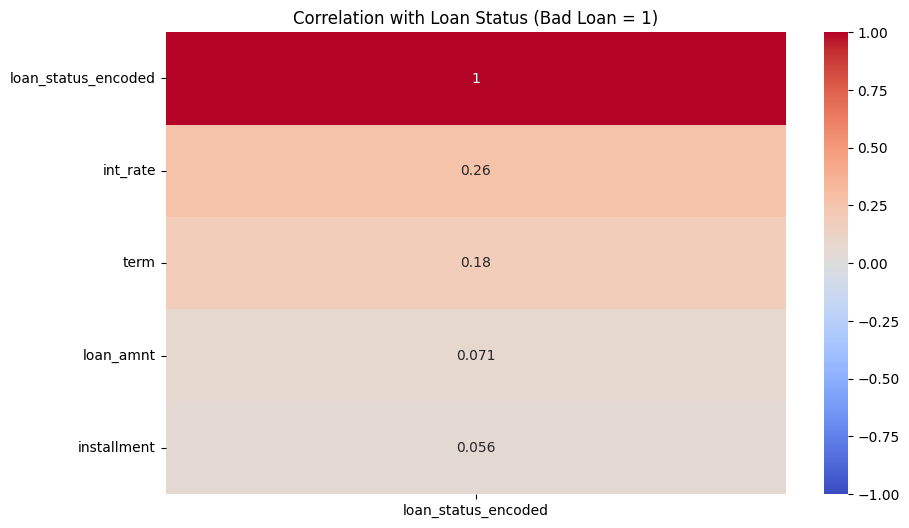

c:\CS\Project\credit-risk-microservice\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


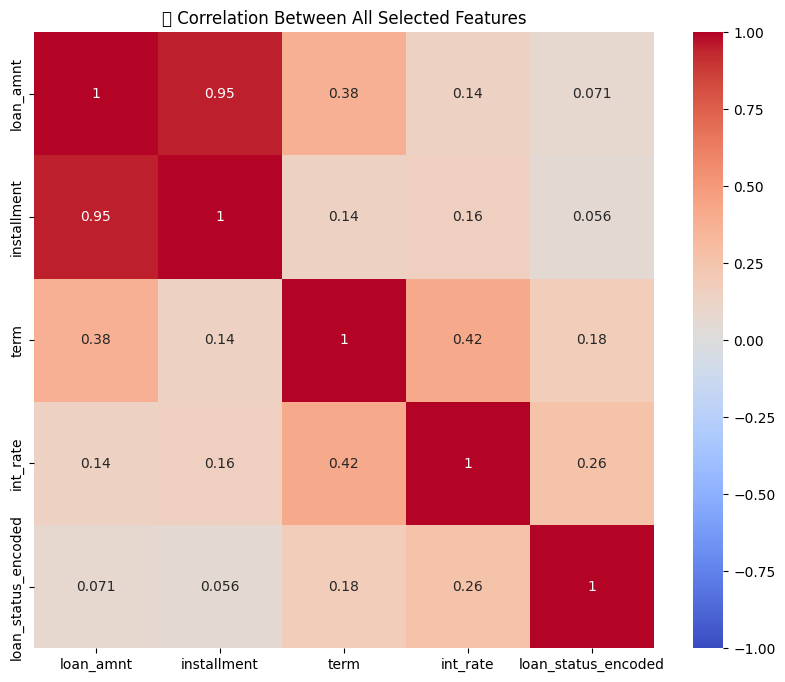

In [22]:
features_loanCharacteristics = [
    "loan_amnt",
    "installment",
    "term",
    "int_rate",
    'loan_status_encoded'
]

corr_matrix3 = data[features_loanCharacteristics].corr()
# Step 4: Plot heatmap showing correlation with loan_status
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix3[['loan_status_encoded']].sort_values(by='loan_status_encoded', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title('Correlation with Loan Status (Bad Loan = 1)')
plt.show()

# Heatmap: Full correlation between all features
plt.figure(figsize=(10, 8))
full_corr3 = data[features_loanCharacteristics].corr()
sns.heatmap(full_corr3, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('📊 Correlation Between All Selected Features')
plt.show()


In [23]:
corr_loan = data[features_loanCharacteristics].corr()['loan_status_encoded'].drop('loan_status_encoded')
corr_loan.sort_values().hvplot.barh(
    width=600, height=400,
    title="Correlation with Loan Status (Bad Loan = 1)",
    ylabel="Numerical Features", xlabel="Correlation"
)

:Bars   [index]   (loan_status_encoded)

### Credit profile

In [24]:
data["open_acc"].value_counts()

open_acc
9.0     117720
10.0    114635
8.0     112906
11.0    105816
7.0     101583
         ...  
72.0         1
86.0         1
88.0         1
84.0         1
75.0         1
Name: count, Length: 84, dtype: int64

In [25]:
data["total_acc"].value_counts()

total_acc
20.0     47941
21.0     47700
22.0     47516
19.0     47335
18.0     46740
         ...  
141.0        1
127.0        1
150.0        1
156.0        1
117.0        1
Name: count, Length: 142, dtype: int64

In [26]:
data["num_rev_accts"].value_counts()

num_rev_accts
10.0     74142
11.0     73634
9.0      72651
12.0     71523
8.0      69592
         ...  
100.0        1
127.0        1
128.0        1
113.0        1
0.0          1
Name: count, Length: 106, dtype: int64

In [27]:
data["num_il_tl"].value_counts()

num_il_tl
4.0      107366
3.0      106211
5.0      102671
2.0       95787
6.0       94856
          ...  
109.0         1
94.0          1
90.0          1
150.0         1
138.0         1
Name: count, Length: 113, dtype: int64

In [28]:
data["num_actv_bc_tl"].value_counts()

num_actv_bc_tl
3.0     269586
2.0     256510
4.0     209294
1.0     143930
5.0     139814
6.0      86753
7.0      51071
8.0      30075
0.0      26974
9.0      17757
10.0     10479
11.0      6279
12.0      3683
13.0      2236
14.0      1272
15.0       833
16.0       489
17.0       362
18.0       212
19.0       143
20.0        71
21.0        51
22.0        43
23.0        25
24.0        22
26.0        14
25.0        13
30.0         5
27.0         3
29.0         2
28.0         2
32.0         2
33.0         2
35.0         1
Name: count, dtype: int64

In [29]:
data["num_actv_rev_tl"].sample(3)

1297852    9.0
1458869    3.0
1955130    6.0
Name: num_actv_rev_tl, dtype: float64

In [30]:
data["total_bc_limit"].sample(5)

662627     38000.0
2232239     7550.0
1209698    10300.0
26065       8800.0
1718905    16000.0
Name: total_bc_limit, dtype: float64

In [31]:
data["total_rev_hi_lim"].sample(5)

902616     15500.0
635957         0.0
1366373    21900.0
823649      6000.0
1761122    14400.0
Name: total_rev_hi_lim, dtype: float64

In [32]:
# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
data["acc_now_delinq"].value_counts()

acc_now_delinq
0.0     1319275
1.0        5900
2.0         304
3.0          41
4.0          10
5.0           3
6.0           1
14.0          1
Name: count, dtype: int64

In [33]:
# Change the data "acc_now_delinq" into "has_current_delienquency"
# 0: No current delinquency
# 1: Has one or more delienquecies
data['has_current_delinquency'] = (data['acc_now_delinq'] > 0).astype(int)
data["has_current_delinquency"].value_counts()

has_current_delinquency
0    1319275
1       6260
Name: count, dtype: int64

In [34]:
# num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months)
# num_tl_90g_dpd_24m: Number of accounts currently 30 days past due (updated in past 2 months)
# num_tl_30dpd: Number of accounts 90 or more days past due in last 24 months
data['has_serious_delinquency'] = (
    (data['num_tl_120dpd_2m'] > 0) |
    (data['num_tl_90g_dpd_24m'] > 0) |
    (data['num_tl_30dpd'] > 0)
).astype(int)
data['has_serious_delinquency'].value_counts()


has_serious_delinquency
0    1249508
1      76027
Name: count, dtype: int64

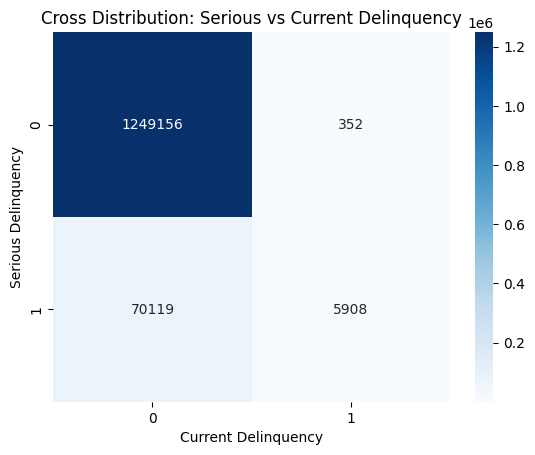

In [35]:
cross = pd.crosstab(
    data['has_serious_delinquency'],
    data['has_current_delinquency'],
    rownames=['Serious Delinquency'],
    colnames=['Current Delinquency']
)

# Plot as heatmap
sns.heatmap(cross, annot=True, fmt='d', cmap='Blues')
plt.title("Cross Distribution: Serious vs Current Delinquency")
plt.show()

In [36]:
# Number of trades opened in past 24 months.
data["acc_open_past_24mths"].value_counts()

acc_open_past_24mths
3.0     187266
4.0     179552
2.0     165450
5.0     155189
6.0     123277
1.0     115572
7.0      92831
8.0      66374
0.0      50275
9.0      46009
10.0     31403
11.0     21120
12.0     13928
13.0      9305
14.0      6444
15.0      4252
16.0      2902
17.0      1965
18.0      1471
19.0      1027
20.0       677
21.0       521
22.0       379
23.0       248
24.0       178
25.0       144
26.0       107
27.0        83
28.0        63
29.0        60
31.0        30
30.0        28
33.0        21
32.0        19
34.0        15
35.0        11
37.0         9
36.0         7
39.0         6
40.0         6
42.0         5
46.0         5
38.0         4
45.0         3
50.0         2
49.0         2
47.0         2
54.0         1
56.0         1
64.0         1
41.0         1
48.0         1
53.0         1
44.0         1
Name: count, dtype: int64

In [37]:
# How many times the borrower was at least 30 days late on any loan or credit account within the 
# past 24 months.
data["delinq_2yrs"].value_counts()

delinq_2yrs
0.0     1069711
1.0      169962
2.0       49767
3.0       18135
4.0        8024
5.0        4147
6.0        2266
7.0        1275
8.0         752
9.0         476
10.0        327
11.0        211
12.0        143
13.0        101
14.0         79
15.0         46
16.0         33
18.0         21
17.0         17
19.0         13
20.0         10
21.0          5
22.0          3
29.0          2
26.0          2
25.0          2
30.0          1
27.0          1
39.0          1
24.0          1
36.0          1
Name: count, dtype: int64

In [38]:
# Number of credit inquiries in past 12 months
# This refers to the number of times a lender or financial institution checked your credit report in the last 12 months.
# A high number of inquiries might suggest credit-seeking behavior, which can be risky to lenders.
# Too many inquiries in a short time can lower your credit score slightly.
data["inq_last_12m"].value_counts()

inq_last_12m
0.0     123715
1.0     120586
2.0      92114
3.0      63679
4.0      41962
5.0      26577
6.0      17216
7.0      11063
8.0       7330
9.0       4836
10.0      3085
11.0      2183
12.0      1460
13.0      1054
14.0       762
15.0       528
16.0       434
17.0       264
18.0       194
19.0       168
20.0       110
21.0        84
22.0        65
23.0        45
24.0        33
27.0        25
26.0        24
25.0        23
29.0        12
28.0         9
32.0         8
30.0         8
31.0         6
34.0         5
40.0         3
33.0         2
35.0         2
36.0         1
67.0         1
49.0         1
45.0         1
41.0         1
37.0         1
Name: count, dtype: int64

In [39]:
# Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# percentage of your credit card limits that you’re using right now
# High utilization (e.g. above 80%) means you're using a lot of your available credit, which can be a warning sign to lenders
# Low utilization (e.g. under 30%) is considered healthy — it means you're not relying too much on debt.
data["revol_util"].value_counts()

revol_util
0.00      6863
57.00     2614
54.00     2602
58.00     2601
53.00     2590
          ... 
0.46         1
37.63        1
0.49         1
7.28         1
154.90       1
Name: count, Length: 1365, dtype: int64

In [40]:
data["chargeoff_within_12_mths"].value_counts()

chargeoff_within_12_mths
0.0     1314741
1.0        9773
2.0         754
3.0         128
4.0          46
5.0          18
6.0           7
7.0           6
9.0           3
8.0           2
10.0          1
Name: count, dtype: int64

In [41]:
# Percent of trades never delinquent
data["pct_tl_nvr_dlq"].value_counts()

pct_tl_nvr_dlq
100.0    618952
95.0      18394
90.0      17806
96.0      16756
91.7      12598
          ...  
52.7          1
41.5          1
39.2          1
23.7          1
25.8          1
Name: count, Length: 631, dtype: int64

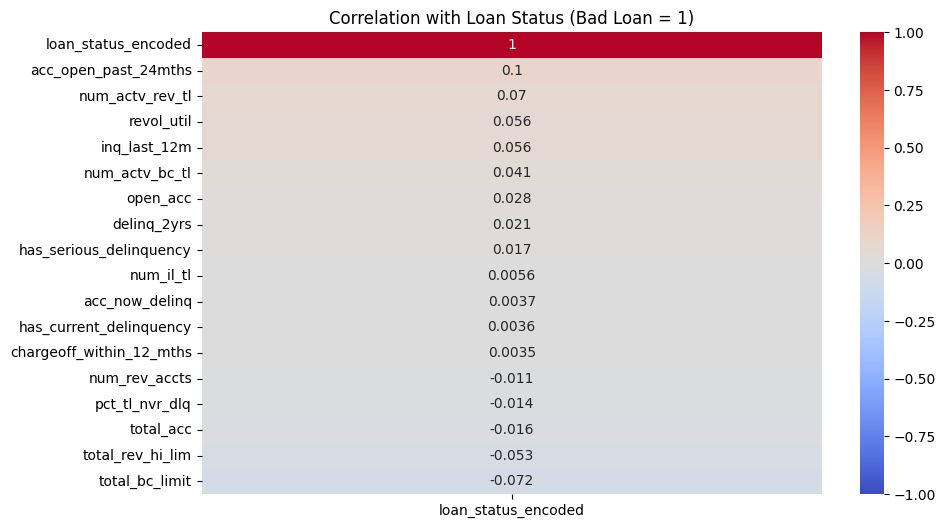

c:\CS\Project\credit-risk-microservice\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


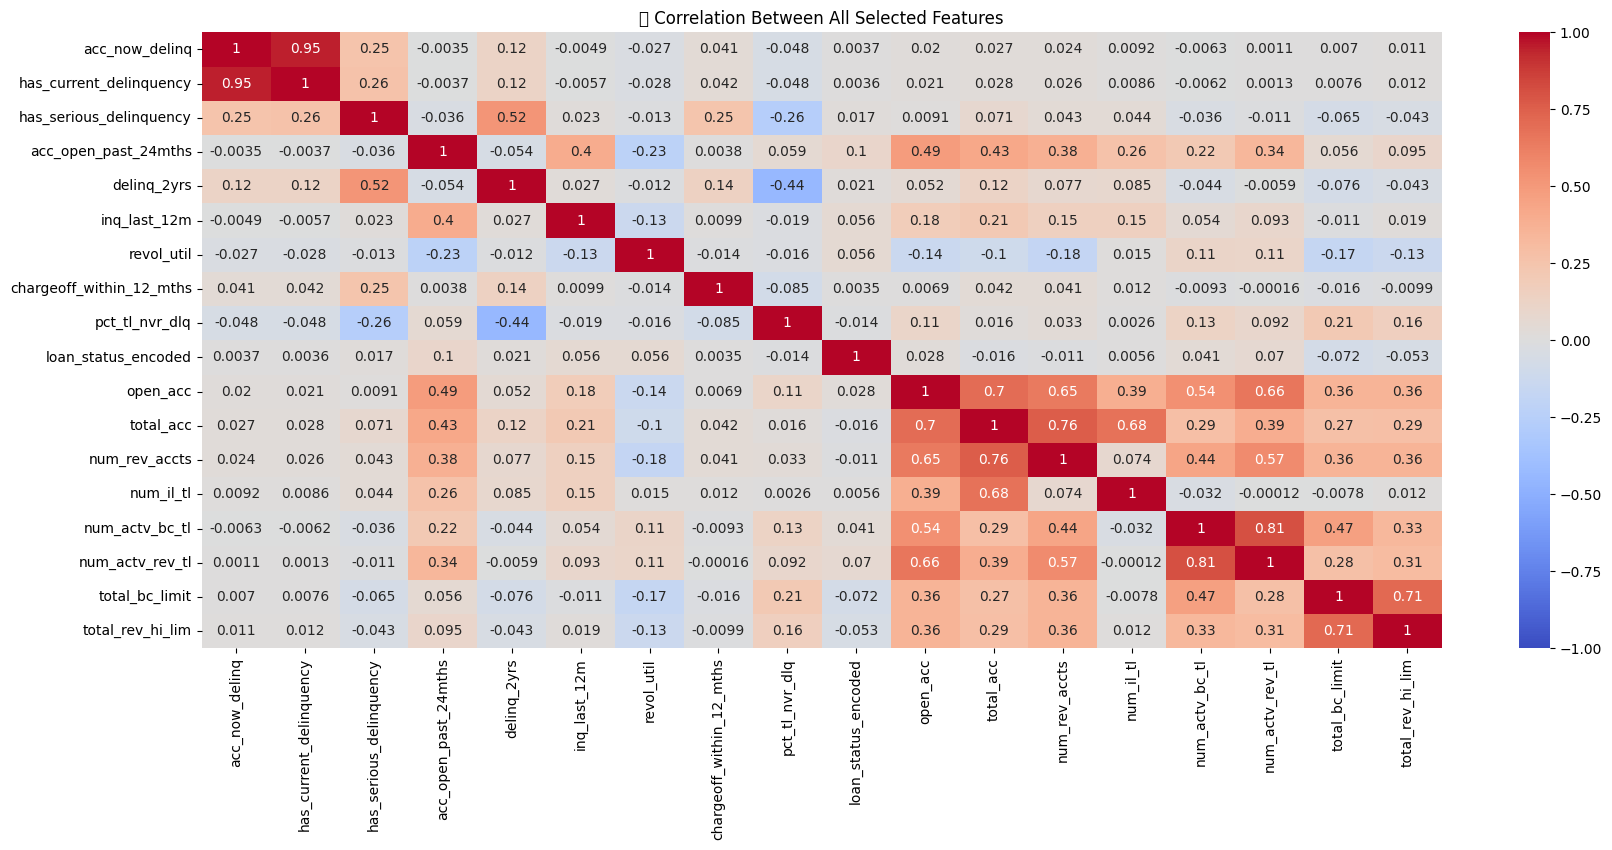

In [42]:
features_creditProdile = [
    'acc_now_delinq', 
    'has_current_delinquency', 
    'has_serious_delinquency', 
    'acc_open_past_24mths', 
    'delinq_2yrs', 
    'inq_last_12m', 
    'revol_util', 
    'chargeoff_within_12_mths', 
    'pct_tl_nvr_dlq', 
    'loan_status_encoded',
    'open_acc',
    'total_acc',
    'num_rev_accts',
    'num_il_tl',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'total_bc_limit',
    'total_rev_hi_lim'

]

# Step 3: Create correlation matrix
corr_matrix1 = data[features_creditProdile].corr()

# Step 4: Plot heatmap showing correlation with loan_status
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix1[['loan_status_encoded']].sort_values(by='loan_status_encoded', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title('Correlation with Loan Status (Bad Loan = 1)')
plt.show()

# Heatmap: Full correlation between all features
plt.figure(figsize=(20, 8))
full_corr1 = data[features_creditProdile].corr()
sns.heatmap(full_corr1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('📊 Correlation Between All Selected Features')
plt.show()

In [43]:
corr_credit = data[features_creditProdile].corr()['loan_status_encoded'].drop('loan_status_encoded')
corr_credit.sort_values().hvplot.barh(
    width=600, height=400,
    title="Correlation with Loan Status (Bad Loan = 1)",
    ylabel="Numerical Features", xlabel="Correlation"
)

:Bars   [index]   (loan_status_encoded)

### Borrower profile

In [44]:
data["annual_inc"].value_counts()

annual_inc
60000.0     51329
50000.0     45130
65000.0     38165
70000.0     36439
40000.0     35008
            ...  
59320.0         1
126031.0        1
57838.0         1
70405.0         1
141416.2        1
Name: count, Length: 63725, dtype: int64

In [45]:
data["dti"].value_counts()

dti
18.00     977
19.20     963
14.40     945
16.80     934
13.20     910
         ... 
91.20       1
60.86       1
78.38       1
119.59      1
59.79       1
Name: count, Length: 7033, dtype: int64

In [46]:
data["home_ownership"].value_counts()

home_ownership
MORTGAGE    654902
RENT        527576
OWN         142585
ANY            280
OTHER          144
NONE            48
Name: count, dtype: int64

In [47]:
data["home_ownership"].sample(5)

1922394        RENT
936139         RENT
1980910        RENT
2110132        RENT
1415708    MORTGAGE
Name: home_ownership, dtype: object

In [48]:
data["emp_length"].value_counts()

emp_length
10+ years    435275
2 years      119830
< 1 year     106530
3 years      106021
1 year        87249
5 years       82985
4 years       79391
6 years       61856
8 years       59912
7 years       58915
9 years       50180
Name: count, dtype: int64

In [49]:
def parse_emp_length(val):
    if pd.isna(val):
        return np.nan
    elif val == '< 1 year':
        return 0
    elif val == '10+ years':
        return 10
    else:
        return int(val.strip().split()[0])

# Apply and create a clean column
data['emp_length_clean'] = data['emp_length'].apply(parse_emp_length)

In [50]:
data[['emp_length', 'emp_length_clean']].value_counts()

emp_length  emp_length_clean
10+ years   10.0                435275
2 years     2.0                 119830
< 1 year    0.0                 106530
3 years     3.0                 106021
1 year      1.0                  87249
5 years     5.0                  82985
4 years     4.0                  79391
6 years     6.0                  61856
8 years     8.0                  59912
7 years     7.0                  58915
9 years     9.0                  50180
Name: count, dtype: int64

In [51]:
data["emp_length_clean"].value_counts()

emp_length_clean
10.0    435275
2.0     119830
0.0     106530
3.0     106021
1.0      87249
5.0      82985
4.0      79391
6.0      61856
8.0      59912
7.0      58915
9.0      50180
Name: count, dtype: int64

In [52]:
# Average current balance of all accounts
data["avg_cur_bal"].value_counts()

avg_cur_bal
0.0         363
1971.0      167
2253.0      163
2842.0      162
2606.0      162
           ... 
82679.0       1
73984.0       1
56635.0       1
113261.0      1
91799.0       1
Name: count, Length: 76482, dtype: int64

In [53]:
# Total credit revolving balance
# total unpaid balance on credit cards or other revolving credit lines.
data["revol_bal"].value_counts()

revol_bal
0         6452
5235       108
6312       101
2          101
8           99
          ... 
174570       1
300272       1
67358        1
166512       1
120704       1
Name: count, Length: 83202, dtype: int64

In [54]:
#Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# it tells you how close they are to maxing out their credit
data["revol_util"].value_counts()

revol_util
0.00      6863
57.00     2614
54.00     2602
58.00     2601
53.00     2590
          ... 
0.46         1
37.63        1
0.49         1
7.28         1
154.90       1
Name: count, Length: 1365, dtype: int64

In [55]:
# Ratio of total current balance to high credit/credit limit for all bankcard accounts.
# bc_util = (current balance on credit cards) / (total credit limit on those cards)
# It’s a sign of how well the borrower manages credit card debt
data["bc_util"].value_counts()

bc_util
0.0      15014
98.0      3627
97.0      3405
99.0      3352
96.0      3349
         ...  
143.4        1
157.0        1
134.5        1
150.2        1
128.0        1
Name: count, Length: 1440, dtype: int64

In [56]:
# Ratio of current balance to original loan amount across all installment loans (like auto loans, personal loans, student loans, etc.)
data["il_util"].value_counts()

il_util
83.0     9442
81.0     9332
86.0     9127
85.0     9079
78.0     9014
         ... 
464.0       1
252.0       1
199.0       1
231.0       1
311.0       1
Name: count, Length: 236, dtype: int64

c:\CS\Project\credit-risk-microservice\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


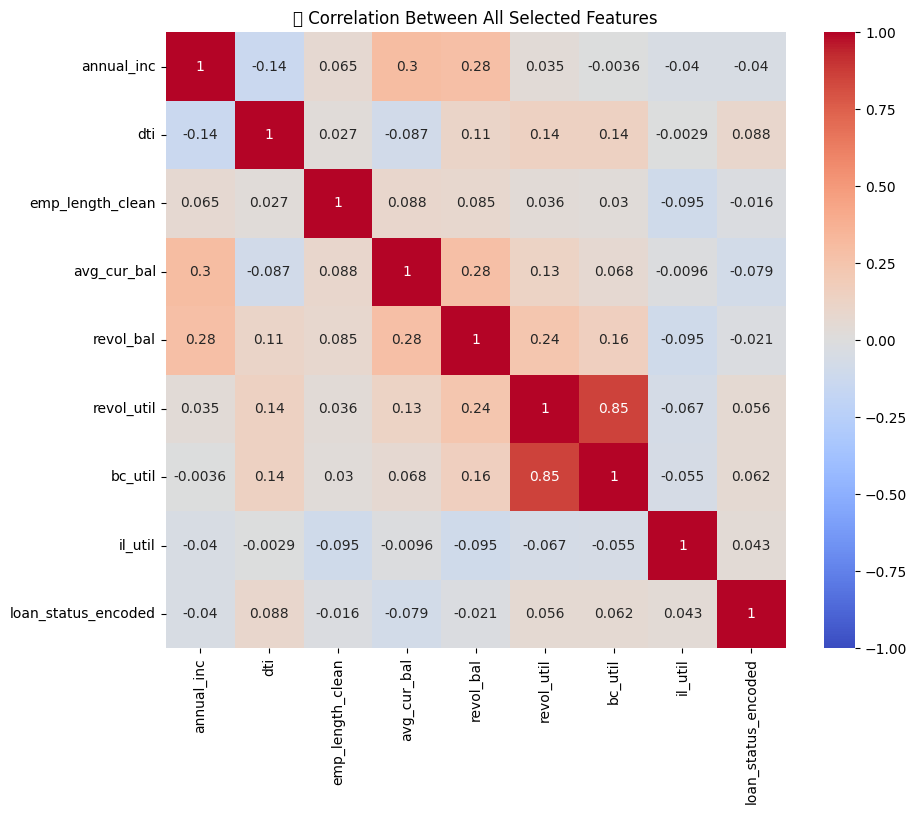

In [57]:
features_borrowerProfile = [
    "annual_inc",
    "dti",
    "emp_length_clean",
    "avg_cur_bal",
    "revol_bal",
    "revol_util",
    "bc_util",
    "il_util",
    "loan_status_encoded"   # <-- add this line
]

# Heatmap: Full correlation between all features
plt.figure(figsize=(10, 8))
full_corr2 = data[features_borrowerProfile].corr()
sns.heatmap(full_corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('📊 Correlation Between All Selected Features')
plt.show()

In [58]:
corr_borrower = data[features_borrowerProfile].corr()['loan_status_encoded'].drop('loan_status_encoded')

# Plot
corr_borrower.sort_values().hvplot.barh(
    width=600, height=400,
    title="Correlation with Loan Status (Bad Loan = 1)",
    ylabel="Numerical Features", xlabel="Correlation"
)

:Bars   [index]   (loan_status_encoded)

In [59]:
selected_features = [
     # Loan characteristics
    'int_rate', 'term', 'loan_amnt', 'installment', "grade", "purpose", "application_type"

    # Credit behavior & history
    'acc_open_past_24mths', 'revol_util', 'inq_last_12m',
    'delinq_2yrs', 'has_serious_delinquency','num_actv_rev_tl', 

    # Borrower profile
    'dti', 'bc_util', 'il_util', 'annual_inc',
    'avg_cur_bal', 'emp_length_clean',
]

### Outliers Detection and Removing

In [60]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col not in df.columns:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [61]:
features_for_outlier_removal = [
    'int_rate', 'term', 'loan_amnt', 'installment',
    'acc_open_past_24mths', 'revol_util', 'inq_last_12m',
    'delinq_2yrs', 'dti', 'bc_util', 'il_util',
    'annual_inc', 'avg_cur_bal', 'emp_length_clean',
    'num_actv_rev_tl'
]

# Store original shape to compare later
original_shape = data.shape
data_original = data.copy()

# Apply removal
data = remove_outliers_iqr(data, features_for_outlier_removal)

print(f"✅ Outliers removed. New shape: {data.shape}, dropped {original_shape[0] - data.shape[0]} rows.")

✅ Outliers removed. New shape: (180914, 148), dropped 1144621 rows.


In [62]:
data_original.shape

(1325535, 148)

### Data preprocessing

In [63]:
print(f"The Length of the data: {data.shape}")


The Length of the data: (180914, 148)


In [64]:
selected_features = [
     # Loan characteristics
    'int_rate', 'term', 'loan_amnt', 'installment', "grade", "purpose", "application_type"

    # Credit behavior & history
    'acc_open_past_24mths', 'revol_util', 'inq_last_12m',
    'delinq_2yrs', 'has_serious_delinquency','num_actv_rev_tl', 'verification_status',

    # Borrower profile
    'dti', 'bc_util', 'il_util', 'annual_inc',
    'avg_cur_bal', 'emp_length_clean', "home_ownership"
]

#### Handling missing values

In [65]:
features_used = [
    # 📥 Input features (used to predict)
    'int_rate', 'term', 'loan_amnt', 'installment', 'annual_inc',
    'dti', 'avg_cur_bal', 'revol_bal', 'revol_util', 'bc_util', 'il_util',
    'acc_open_past_24mths', 'inq_last_12m', 'delinq_2yrs',
    'emp_length_clean', 'num_actv_rev_tl',

    # 🎯 Target label
    'loan_status_encoded'
]

missing_report = data[features_used].isna().sum()
missing_report = missing_report[missing_report > 0].sort_values(ascending=False)
print(missing_report)

Series([], dtype: int64)


#### Categorical Variables and Dummies

In [66]:
data["term"].value_counts()

term
36    180914
Name: count, dtype: int64

In [67]:
data["purpose"].value_counts()

purpose
debt_consolidation    100334
credit_card            38576
other                  14167
home_improvement       11185
major_purchase          4606
medical                 2885
car                     2447
vacation                2000
moving                  1896
small_business          1736
house                    946
renewable_energy         135
wedding                    1
Name: count, dtype: int64

In [68]:
data["application_type"].value_counts()

application_type
Individual    176184
Joint App       4730
Name: count, dtype: int64

In [69]:
data["home_ownership"].value_counts()

home_ownership
RENT        86358
MORTGAGE    73890
OWN         20556
ANY           110
Name: count, dtype: int64

In [70]:
data["verification_status"].value_counts()

verification_status
Source Verified    76494
Not Verified       63365
Verified           41055
Name: count, dtype: int64

In [71]:
data["grade"].value_counts()

grade
B    62447
C    51403
A    40826
D    20971
E     4921
F      344
G        2
Name: count, dtype: int64

In [72]:
print([column for column in data.columns if data[column].dtype == object])


['grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date']


In [73]:
data['purpose'] = data['purpose'].replace({
    'educational': 'other',
    'renewable_energy': 'other',
    'wedding': 'other',
    'vacation': 'other',
    'moving': 'other',
    'house': 'other'
})
data["purpose"].value_counts()

purpose
debt_consolidation    100334
credit_card            38576
other                  19145
home_improvement       11185
major_purchase          4606
medical                 2885
car                     2447
small_business          1736
Name: count, dtype: int64

In [74]:
# Recommended encoding
data = pd.get_dummies(
    data,
    columns=['purpose', 'grade', 'application_type'],
    drop_first=False
)

In [75]:
[p for p in data.columns if p.startswith('grade_')]


['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G']

In [76]:
data["grade_A"].value_counts()


grade_A
False    140088
True      40826
Name: count, dtype: int64

In [77]:
data["verification_status"].value_counts()

verification_status
Source Verified    76494
Not Verified       63365
Verified           41055
Name: count, dtype: int64

In [78]:

data['home_ownership'] = data['home_ownership'].replace({'ANY': 'OTHER', 'NONE': 'OTHER'})
data["home_ownership"].value_counts()

home_ownership
RENT        86358
MORTGAGE    73890
OWN         20556
OTHER         110
Name: count, dtype: int64

In [79]:
# Dummy encoding
data = pd.get_dummies(data, columns=['home_ownership', 'verification_status'], drop_first=False)

In [80]:
[p for p in data.columns if p.startswith('home_ownership_')]

['home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT']

#### Handling duplicate cols and maybe rows

In [81]:
# Check for duplicate columns
duplicate_columns = data.columns[data.T.duplicated()]
print("Duplicate columns:", list(duplicate_columns))


Duplicate columns: ['member_id', 'funded_amnt', 'url', 'acc_now_delinq', 'delinq_amnt', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'hardship_length', 'has_current_delinquency', 'has_serious_delinquency']


In [82]:
data = data.drop(columns=[
    'member_id',
    'funded_amnt',
    'url',
    'acc_now_delinq',
    'delinq_amnt',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'hardship_length',
])
